In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import json
from shapely.geometry import Polygon
import numpy as np

if 'REPO_PATH' not in locals():
    os.chdir('../')
    REPO_PATH = os.getcwd()

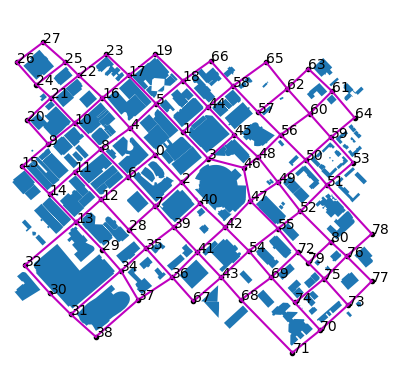

In [3]:
with open('data/uptownCharlotte.json') as f:
    city = [Polygon(item) for item in json.load(f)]

nodes = np.array([
    [-150, 150],
    [-45, 235],
    [-50, 45],
    [50, 135],
    [-245, 250],
    [-147, 343],
    [-253, 66],
    [-150, -45],
    [-357, 170],
    [-555, 190],
    [-455, 270],
    [-455, 85],
    [-355, -20],
    [-450, -105],
    [-550, 0],
    [-655, 105],
    [-350, 365],
    [-250, 450],
    [-45, 430],
    [-150, 530],
    [-635, 280],
    [-545, 365],
    [-440, 450],
    [-335, 530],
    [-600, 415],
    [-490, 500],
    [-675, 500],
    [-575, 575],
    [-250, -135],
    [-350, -210],
    [-550, -375],
    [-470, -455],
    [-645, -270],
    [np.nan, np.nan],
    [-280, -290],
    [-185, -205],
    [-85, -315],
    [-215, -400],
    [-375, -540],
    [-80, -125],
    [20, -35],
    [10, -220],
    [115, -125],
    [100, -315],
    [50, 330],
    [150, 225],
    [185, 100],
    [210, -25],
    [240, 140],
    [315, 45],
    [420, 130],
    [500, 35],
    [400, -65],
    [600, 120],
    [205, -215],
    [315, -130],
    [325, 225],
    [240, 310],
    [145, 410],
    [515, 215],
    [435, 305],
    [520, 390],
    [350, 400],
    [430, 475],
    [605, 290],
    [270, 500],
    [60, 505],
    [-5, -405],
    [175, -400],
    [290, -315],
    [475, -515],
    [370, -600],
    [390, -220],
    [580, -420],
    [380, -410],
    [490, -320],
    [575, -235],
    [670, -330],
    [670, -150],
    [430, -260],
    [515, -180]
])
edges = [
    (0, 2),
    (0, 4),
    (0, 6),
    (1, 5),
    (1, 3),
    (1, 44),
    (4, 5),
    (4, 8),
    (4, 16),
    (8, 6),
    (8, 11),
    (8, 10),
    (6, 12),
    (6, 7),
    (12, 11),
    (12, 28),
    (12, 13),
    (13, 14),
    (13, 29),
    (13, 32),
    (14, 11),
    (14, 15),
    (15, 9),
    (9, 10),
    (10, 16),
    (16, 17),
    (5, 17),
    (17, 19),
    (19, 18),
    (5, 18),
    (18, 44),
    (17, 23),
    (16, 22),
    (10, 21),
    (9, 20),
    (20, 21),
    (21, 22),
    (22, 23),
    (21, 24),
    (22, 25),
    (24, 25),
    (24, 26),
    (25, 27),
    (26, 27),
    (32, 30),
    (30, 31),
    (31, 38),
    (31, 34),
    (34, 35),
    (34, 37),
    (35, 39),
    (35, 28),
    (39, 40),
    (7, 39),
    (2, 40),
    (39, 41),
    (40, 42),
    (37, 36),
    (36, 41),
    (41, 42),
    (41, 43),
    (35, 36),
    (38, 37),
    (28, 7),
    (7, 2),
    (2, 3),
    (29, 34),
    (44, 45),
    (45, 48),
    (3, 46),
    (46, 47),
    (42, 47),
    (42, 54),
    (43, 54),
    (54, 55),
    (55, 47),
    (46, 48),
    (47, 49),
    (49, 52),
    (55, 52),
    (51, 52),
    (51, 53),
    (50, 51),
    (49, 50),
    (48, 49),
    (45, 3),
    (48, 56),
    (44, 58),
    (58, 57),
    (57, 56),
    (56, 50),
    (50, 59),
    (59, 53),
    (56, 60),
    (60, 61),
    (60, 59),
    (59, 64),
    (64, 61),
    (61, 63),
    (57, 62),
    (62, 63),
    (62, 60),
    (18, 66),
    (66, 58),
    (58, 65),
    (65, 62),
    (36, 67),
    (67, 43),
    (43, 68),
    (68, 69),
    (68, 71),
    (71, 70),
    (54, 69),
    (69, 70),
    (55, 72),
    (69, 72),
    (72, 79),
    (79, 75),
    (75, 73),
    (70, 73),
    (74, 75),
    (52, 80),
    (80, 76),
    (75, 76),
    (73, 77),
    (76, 78),
    (78, 51),
    (79, 80),
    (76, 77)
]

fig = plt.figure()
ax = fig.add_subplot()

for i, node in enumerate(nodes):
    ax.text(node[0], node[1], str(i))
for polygon in city:
    ax.add_patch(patches.Polygon(np.array(polygon.exterior.coords)[:, :2], zorder=0))
for edge in edges:
    ax.plot(nodes[edge, 0], nodes[edge, 1], c='m')
ax.scatter(nodes[:, 0], nodes[:, 1], marker='.', c='k')
ax.set_xlim([-700, 700])
ax.set_ylim([-700, 700])

ax.set_aspect('equal', 'box')
ax.set_axis_off()
fig.savefig('notebooks/figures/roadnetwork.pdf')

with open('data/uptownCharlotteNetwork.json', 'w') as f:
    d = {
        'nodes': nodes.tolist(),
        'edges': edges
    }

    json.dump(d, f)

(3294, 2)

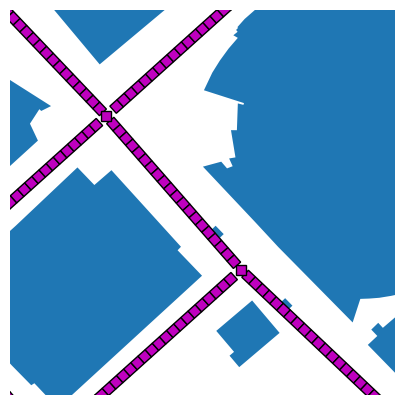

In [4]:
cells = []
cell_poly = []
dl = 5
box = np.array([
    [-dl / 2, -dl / 2],
    [dl / 2, -dl / 2],
    [dl / 2, dl / 2],
    [-dl / 2, dl / 2]
])
for i, j in edges:
    d = np.linalg.norm(nodes[i] - nodes[j])
    u = (nodes[j] - nodes[i]) / d
    m = d % dl / 2
    N = int(np.floor(d / dl)) - 1
    c = [nodes[i] + u * m + u * dl * (k + 1) for k in range(N)]
    R = np.array([u, [u[1], -u[0]]])
    cells += c
    for cell in c:

        cell_poly.append(patches.Polygon(box @ R + np.asarray(cell), zorder=3, fc='m', ec='k'))
cells = np.array(cells)
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot()
# for edge in edges:
#     ax.plot(nodes[edge, 0], nodes[edge, 1], c='m')
    
for polygon in city:
    ax.add_patch(patches.Polygon(np.array(polygon.exterior.coords)[:, :2], zorder=0))
# ax.scatter(nodes[:, 0], nodes[:, 1], marker='.', c='k')
# ax.scatter(cells[:, 0], cells[:, 1], marker='x', c='c')
for poly in cell_poly:
    ax.add_patch(poly)
for node in nodes:
    ax.add_patch(patches.Polygon(box + node, zorder=3, fc='m', ec='k'))
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_aspect('equal', 'box')
ax.set_axis_off()
fig.savefig('notebooks/figures/roadgrid_slides.pdf')
cells.shape

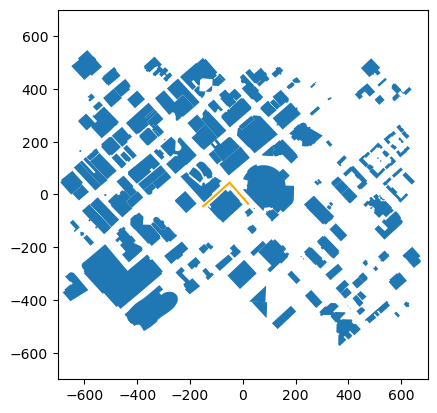

In [5]:
path = nodes[[7, 2, 40]]

fig = plt.figure()
ax = fig.add_subplot()

# for i, node in enumerate(nodes):
#     ax.text(node[0], node[1], str(i))
for polygon in city:
    ax.add_patch(patches.Polygon(np.array(polygon.exterior.coords)[:, :2], zorder=0))
ax.plot(path[:, 0], path[:, 1], c='orange')
ax.set_xlim([-700, 700])
ax.set_ylim([-700, 700])
ax.set_aspect('equal', 'box')

with open('data/environments/paper_slow/path.csv', 'w') as f:
    f.write('\n'.join(
        [','.join([str(path[i, j]) for j in range(path.shape[1])] + [str(.5)]) for i in range(path.shape[0])]
    ))